In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation


In [3]:
res = np.load("../results/rna_cv_results.npy", allow_pickle=True).item()


In [17]:
mat = np.empty((len(res.keys()), 50))
for i,key in enumerate(res.keys()):
    
    mat[i] = res[key]['rmse']

In [18]:
df = pd.DataFrame(mat, index=res.keys())

In [19]:
df.mean(axis=1)

0.1-0.9    0.009217
0.2-0.8    0.009008
0.5-0.5    0.011069
0.8-0.2    0.018603
0.9-0.1    0.042864
dtype: float64

In [20]:
#df = pd.read_csv("CV_50-fold_results.tsv", index_col=0, sep='\t')

values = []
labels = []
for fold in df.index.values:
    values += [df.loc[fold].values]
    labels += [len(df.loc[fold].values)*[fold]]

values = np.hstack(values)
labels = np.hstack(labels)

final = np.vstack([values, labels])
plot_df = pd.DataFrame(final.T, columns = ['rmse', 'split'])

plot_df['split'] = plot_df['split'].astype(str)
plot_df['rmse'] = plot_df['rmse'].astype(float).apply(np.log2)

['0.1-0.9', '0.2-0.8', '0.5-0.5', '0.8-0.2', '0.9-0.1']
0.1-0.9 v.s. 0.2-0.8: t-test independent samples, P_val=9.476e-02 stat=1.687e+00
0.2-0.8 v.s. 0.5-0.5: t-test independent samples, P_val=4.480e-16 stat=-9.738e+00
0.5-0.5 v.s. 0.8-0.2: t-test independent samples, P_val=5.740e-41 stat=-2.280e+01
0.8-0.2 v.s. 0.9-0.1: t-test independent samples, P_val=6.900e-51 stat=-2.977e+01


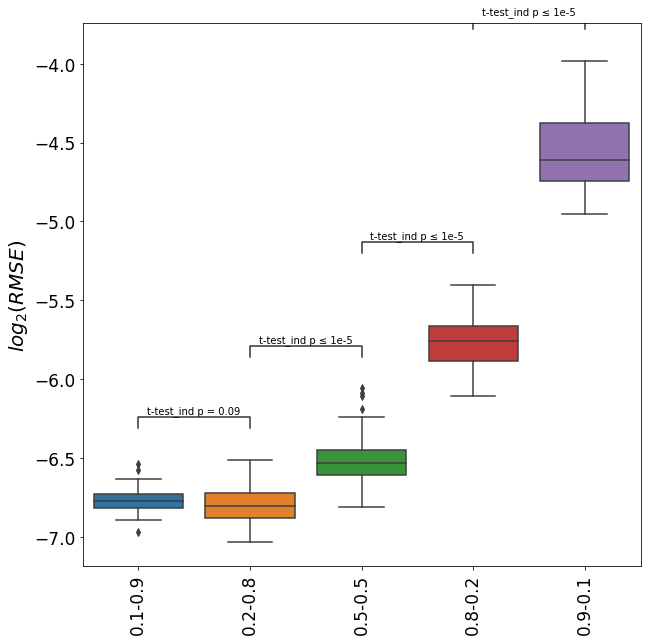

In [21]:
plt.figure(figsize=(10,10))
all_splits = []
split_labels = []

for split in np.unique(plot_df.split.values):
    split_labels += [split]
    all_splits += [df.loc[split].values]
print(split_labels)
ax = sns.boxplot(x="split", y="rmse", data=plot_df)
test_results = add_stat_annotation(ax, data=plot_df, x="split", y="rmse", order=split_labels,
                                   box_pairs=[('0.1-0.9', '0.2-0.8'),
                                              ('0.2-0.8', '0.5-0.5'), ('0.5-0.5', '0.8-0.2'),
                                             ('0.8-0.2','0.9-0.1')],
                                   test='t-test_ind', text_format="simple",loc='inside', verbose=2)

plt.ylabel(r"$log_2(RMSE)$", fontsize=20)
plt.xlabel("")
plt.xticks(np.arange(0,len(all_splits)), split_labels, fontsize=17, rotation=90)
plt.yticks(fontsize=17)

plt.savefig("../plots/RNA_50-fold_results.png", dpi=600)
plt.show()